In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.


    sex: 1 for female and 2 for male.
    age: of the patient.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
    degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
    patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
    pneumonia: whether the patient already have air sacs inflammation or not.
    pregnancy: whether the patient is pregnant or not.
    diabetes: whether the patient has diabetes or not.
    copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma: whether the patient has asthma or not.
    inmsupr: whether the patient is immunosuppressed or not.
    hypertension: whether the patient has hypertension or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    renal chronic: whether the patient has chronic renal disease or not.
    other disease: whether the patient has other disease or not.
    obesity: whether the patient is obese or not.
    tobacco: whether the patient is a tobacco user.
    usmr: Indicates whether the patient treated medical units of the first, second or third level.
    medical unit: type of institution of the National Health System that provided the care.
    intubed: whether the patient was connected to the ventilator.
    icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
    date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


дата смертей

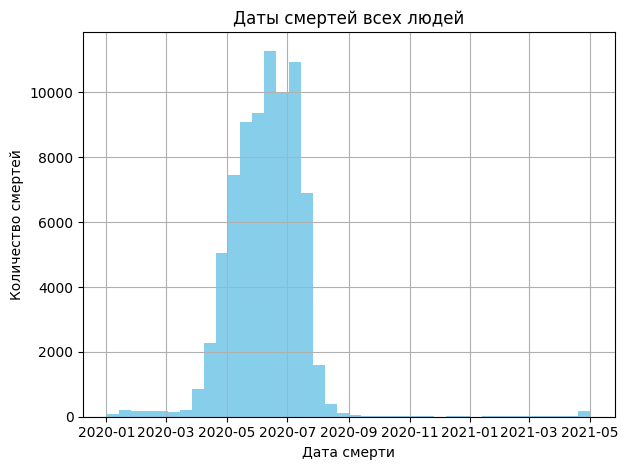

In [23]:
died_df = df[df['DATE_DIED'] != '9999-99-99'].copy()
died_df["DATE_DIED"] = pd.to_datetime(died_df["DATE_DIED"], format='%d/%m/%Y')

died_df.hist("DATE_DIED", bins=40, color='skyblue')
plt.xlabel("Дата смерти")
plt.ylabel("Количество смертей")
plt.title("Даты смертей всех людей")
plt.tight_layout() 
plt.show()


Возраст умерших

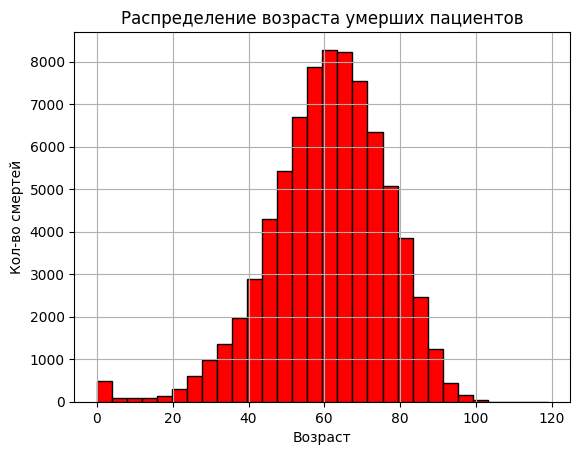

In [24]:
died_df.hist("AGE", bins=30, color = "red", edgecolor='black')
plt.xlabel("Возраст")
plt.ylabel("Кол-во смертей")
plt.title("Распределение возраста умерших пациентов")
plt.show()

Сравниваем кто умер больше курящие или не курящие из тех кто болел ковидом

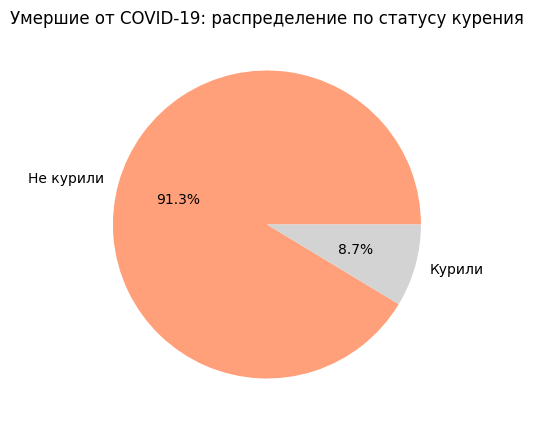

In [25]:
# 1. умершие от ковида (без 4-го класса и без 98 в TOBACCO)
died_df = df[df['DATE_DIED'] != '9999-99-99'].copy()          # только умершие
died_df = died_df[died_df['CLASIFFICATION_FINAL'] != 4]       # без "не ковида"
died_df = died_df[died_df['TOBACCO'] != 98]                   # убираем "98 = неизвестно"

# 2. считаем курящих / не курящих
smoker_counts = died_df['TOBACCO'].value_counts()             # теперь только 0 и 1

# 3. подписи
labels = ['Не курили' if t == 2 else 'Курили' for t in smoker_counts.index]

# 4. круговая диаграмма
plt.figure(figsize=(5,5))
plt.pie(smoker_counts, labels=labels, autopct='%1.1f%%',
        colors=['lightsalmon','lightgray'])
plt.title('Умершие от COVID-19: распределение по статусу курения')
plt.show()

Доля госпитализированных среди умерших

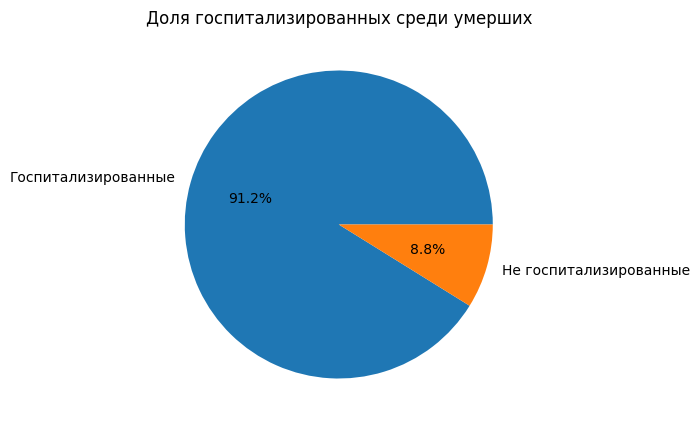

In [26]:
hospitalized_df = died_df["PATIENT_TYPE"].value_counts()
labels = ['Не госпитализированные' if human == 1 else 'Госпитализированные' for human in hospitalized_df.index]
plt.figure(figsize=(5,5))
plt.pie(hospitalized_df, labels=labels, autopct= "%1.1f%%")
plt.title("Доля госпитализированных среди умерших")
plt.show()

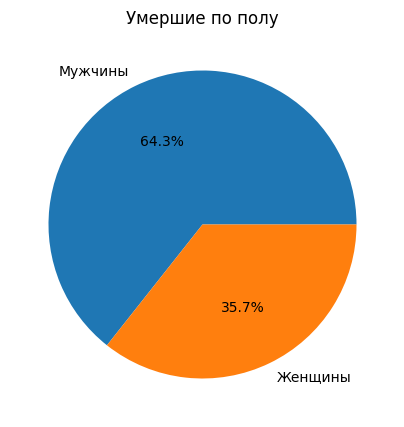

In [27]:
sexdf = died_df["SEX"].value_counts()
labels = ['Женщины' if i == 1 else 'Мужчины' for i in sexdf.index]
plt.figure(figsize=(5,5))
plt.pie(sexdf, labels=labels, autopct="%1.1f%%")
plt.title("Умершие по полу")
plt.show()

Тут я пытался вывести матрицу по почти всем параметрам, для этого я взял только мертвых и удалил строки с незаполненными ячейками (значения 97 98 99). Но у меня выводились пустые линии матрицы у SEX и PATIENT TYPE. Короче оказалось, что это было из-за того, что я оставил параметр pregnant (что оказывается означает беременность), а мужчины не могут быть беременными и поэтому выводилась одна из столбцов пустой. А вторая это из-за patient_type, т.е. госпитализация, а мертвые тоже не проходят госпитализацию.

In [28]:
bool_cols = ['SEX','PNEUMONIA','DIABETES',
             'COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE',
             'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO',
             'INTUBED','ICU','USMER']

clean_df = died_df[~died_df[bool_cols].isin([97,98,99]).any(axis=1)].copy()

num_cols = ['AGE'] + bool_cols
corr_matrix = clean_df[num_cols].corr()

Вот поэтому и получается так

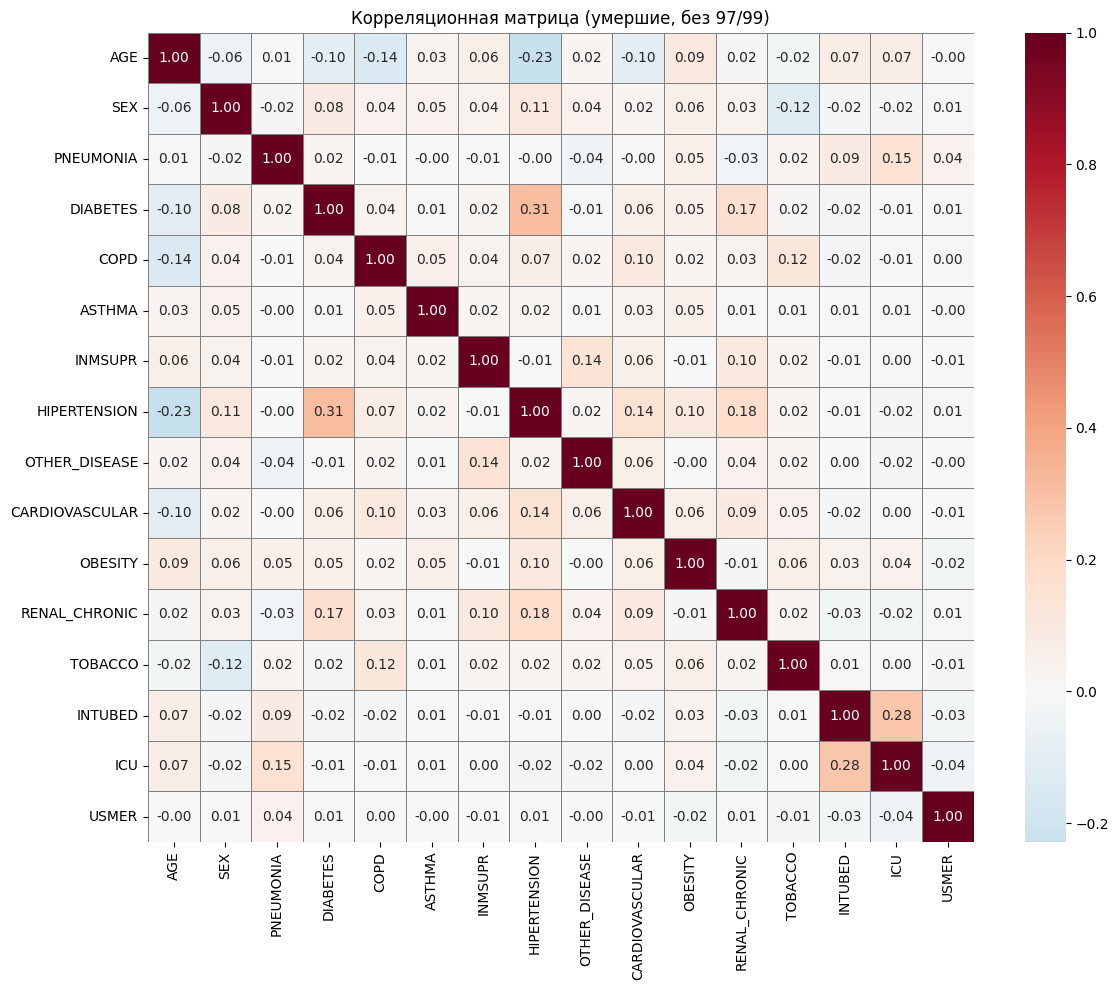

In [29]:
corr_matrix_all = corr_matrix.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
            linewidths=.5, linecolor="gray")
plt.title('Корреляционная матрица (умершие, без 97/99)')
plt.tight_layout()
plt.show()

Популярность болезней у людей мертвых

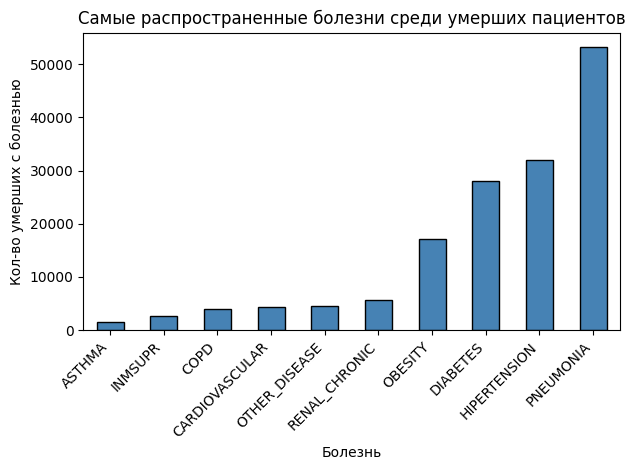

In [30]:
listOfDiseases = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                  'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'PNEUMONIA']

# 1 = да, 2 = нет  →  1/0
counts = (died_df[listOfDiseases] == 1).sum().sort_values(ascending=True)
counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Самые распространенные болезни среди умерших пациентов')
plt.xlabel('Болезнь')
plt.ylabel('Кол-во умерших с болезнью')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Популярность у людей живых

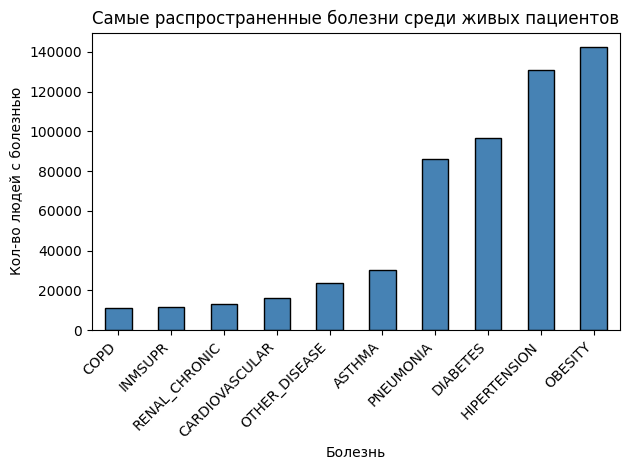

In [31]:
alive_df = df[df['DATE_DIED'] == '9999-99-99'].copy()

counts = (alive_df[listOfDiseases] == 1).sum().sort_values(ascending=True)
counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Самые распространенные болезни среди живых пациентов')
plt.xlabel('Болезнь')
plt.ylabel('Кол-во людей с болезнью')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Кореляция возраста с болезнями

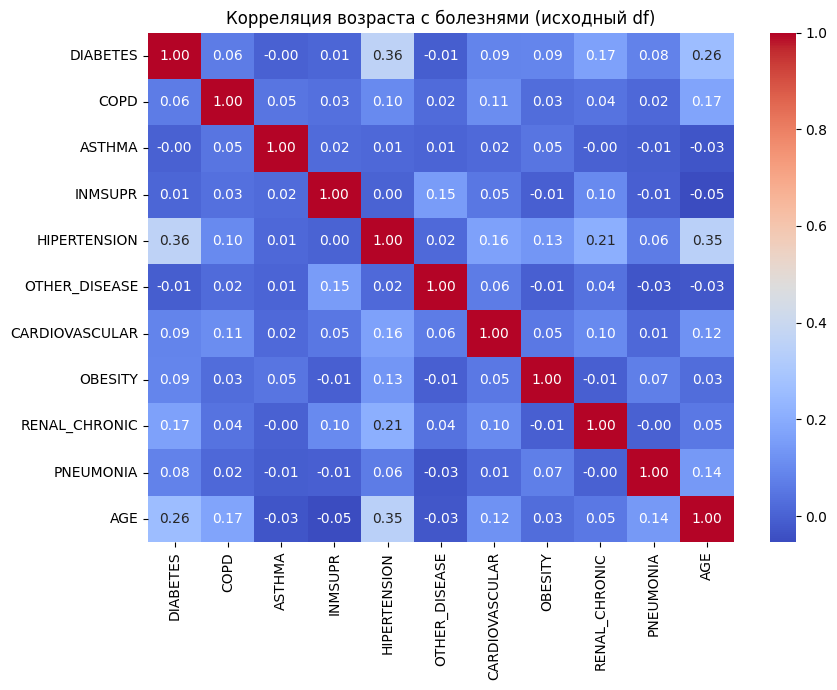

In [ ]:
df_age = pd.get_dummies(df['AGE'], drop_first=False)
df_numeric = pd.concat([df[['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                  'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'PNEUMONIA']], df_age], axis=1)

clean_df2 = df[~df[bool_cols].isin([97,98, 99]).any(axis=1)].copy()

df_corr = clean_df2[listOfDiseases + ['AGE']].replace({2:0})

plt.figure(figsize=(9,7))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция возраста с болезнями (исходный df)')
plt.tight_layout()
plt.show()